#  Task - 4 : SALES PREDICTION USING PYTHON 

This is the task 4 of Codsoft Data Science Internship .

In this task we have to use advertisment dataset which is available on kaggle.

This datast contains cost of advertisment which spend for advertisment on different platform .

My task is to design as Machine learning model that can use this dataset for processing and return  most efficient advertisment platform where the sales can grow according to expectetion .

In [1]:
# importing  required  libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

# for ignoring warnings error 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing dataset 
data = pd.read_csv("advertising.csv")

In [22]:
data.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
print ( " The dataset has "+ str(len(data))+" observations of cost of advertismentand sales ")
print(" The dataset has "+ str(len(data.columns)) + " variables namely " + str(data.columns[0]) + ","+str(data.columns[1]) + ","+str(data.columns[2]) + ","+str(data.columns[3]))

 The dataset has 200 observations of cost of advertismentand sales 
 The dataset has 4 variables namely TV,Radio,Newspaper,Sales


In [5]:
# checking for any null or missing values 
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

The dataset proper without any missing  or null values
so, we can head to feature selection and model training


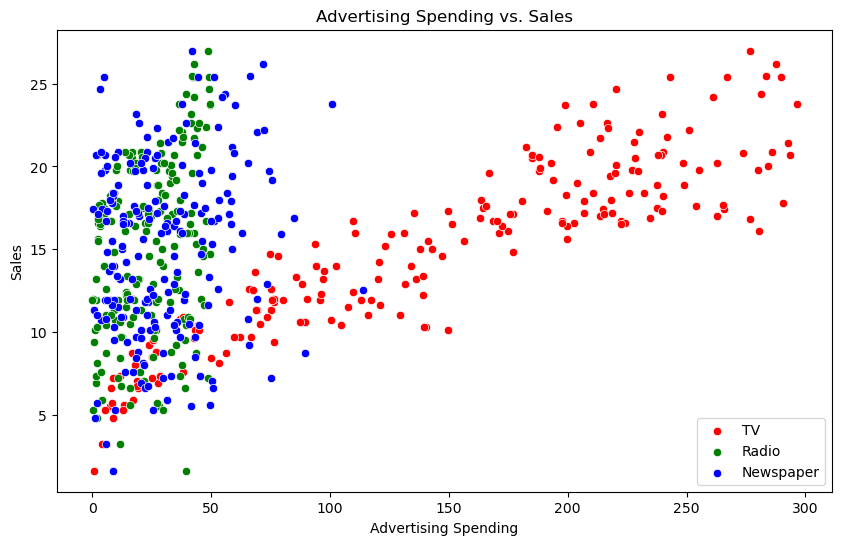

In [6]:
# graphical interptretation for feature selection 
fig, axis = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=data, color='Red', label='TV')
sns.scatterplot(x='Radio', y='Sales', data=data, color='Green', label='Radio')
sns.scatterplot(x='Newspaper', y='Sales', data=data, color='Blue', label='Newspaper')
plt.xlabel('Advertising Spending')
plt.ylabel('Sales')
plt.title('Advertising Spending vs. Sales')
plt.legend()
plt.show()

After observing the graph , I conclude that spending on TV advertisment will increase sales .
let's , create model and train it 

In [7]:
# checking for statistics 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [19]:
x = data[['TV','Radio','Newspaper']]
y = data['Sales']
threshold = 15
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=50)
Y_train_binary = (Y_train > threshold).astype(int)
Y_test_binary = (Y_test > threshold).astype(int)


In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model_1 = GaussianNB()
model_1.fit(X_train,Y_train_binary)

Y_pred_1 = model_1.predict(X_test)

# Calculate the accuracy of the model
accuracy_1 = accuracy_score(Y_test_binary, Y_pred_1)*100
print("Accuracy of GaussianNb :", accuracy_1)


Accuracy of GaussianNb : 93.33333333333333


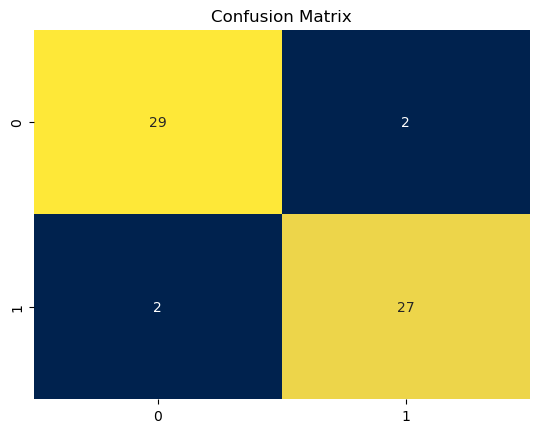

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_binary, Y_pred_1)
plt.xlabel('Y_pred_1')
plt.ylabel('Y_test_binary')
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='cividis', fmt='d', cbar=False)
plt.show()


In [39]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_train,Y_train_binary)
Y_pred_2=model_2.predict(X_test)
accuracy_2=accuracy_score(Y_test_binary,Y_pred_2)*100
print("Accuracy of Logistic Regression :",accuracy_2)

Accuracy of Logistic Regression : 96.66666666666667
